In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import pyhf
from pyhf.contrib.viz import brazil

import glob
import mplhep as mp

## Mediador

In [6]:
signalList = sorted(glob.glob("./histogramsM/pt*.csv"))[:6] + sorted(glob.glob("./histogramsM/pt*.csv"))[10:14] + sorted(glob.glob("./histogramsM/pt*.csv"))[6:10]
signalList

['./histogramsM/pt_miss_histogram_monojet_BM_toy_500_GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BM_toy_550_GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BM_toy_600_GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BM_toy_650_GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BM_toy_700_GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BM_toy_750_GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_800GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_850GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_900GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_950GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_1050GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_1100GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_1150GeV.csv',
 './histogramsM/pt_miss_histogram_monojet_BMtoy_1200GeV.csv']

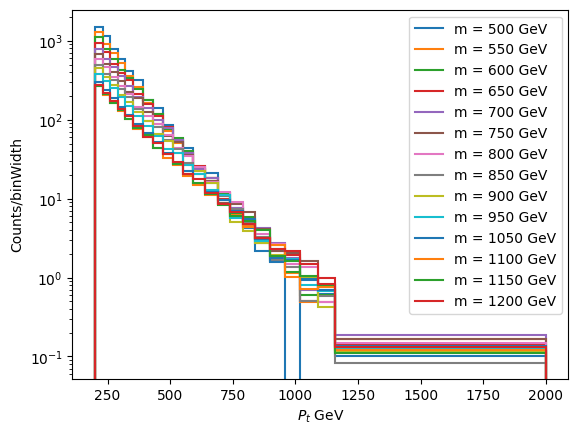

In [3]:
m = 500
for sig in signalList:
    mass = pd.read_csv(sig)
    bins = np.concatenate((mass["bins_lower"], np.asarray([2000])))
    counts = mass["counts"]#/sum(mass["counts"])
    
    if m == 1000:
        m = 1050
        
    mp.histplot(counts, bins, label="m = {} GeV".format(m), binwnorm = True )
    m += 50

plt.yscale("log")
plt.ylabel("Counts/binWidth")
plt.xlabel("$P_t$ GeV")
plt.legend()

In [4]:
MJData = pd.read_csv("MJData.csv")
MJ_bkg = MJData["MJ_bkg"]
MJ_errbkg = MJData["MJ_errbkg"]
MJ_data = MJData["MJ_data"]
MJ_higgs = MJData["MJ_higgs"]
MJ_axial = MJData["MJ_axial"]

In [14]:
def signalAnalysis(sigCSV):
    signal = pd.read_csv(sigCSV)["counts"]
    Data = MJ_data + signal
    model = pyhf.simplemodels.uncorrelated_background(signal=list(signal), bkg=list(MJ_bkg), bkg_uncertainty=list(MJ_errbkg))
    observations = np.concatenate((Data, model.config.auxdata))
    
    poi_values = np.linspace(0.1, 2, 50)
    
    #Mu
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True)
    #Confidence level
    CL = pyhf.infer.hypotest(
    1, observations, model, return_expected = True, return_expected_set = True, return_tail_probs = True)
    
    pval = CL[1][0]
    clsb = CL[1][1]
    clb = CL[0]
    cls = CL[2]
    clsSigmas = CL[3]
    
    return obs_limit, exp_limits[2], pval, clsb, clb, cls, clsSigmas

In [15]:
signalAnalysis('./histogramsM/pt_miss_histogram_monojet_BM_toy_500_GeV.csv')


(array(1.03035369),
 array(0.1),
 array(0.5),
 array(1.),
 array(0.5),
 array(0.),
 [array(0.), array(0.), array(0.), array(0.), array(0.)])

In [ ]:
f = open("resultados.txt", "at")
poi_values1 = np.linspace(0.01, 2, 50)

for signal in signalList:
    Sig = pd.read_csv(signal)["counts"]
    Data = MJ_data + Sig
    model1 = pyhf.simplemodels.uncorrelated_background(
        signal=list(Sig), bkg=list(MJ_bkg), bkg_uncertainty=list(MJ_errbkg)
    ) #creamos el modelo

    observations1 = np.concatenate((Data, model1.config.auxdata))

    obs_limit1, exp_limits1, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
        observations1, model1, poi_values1, level=0.05, return_results=True
    )
    CL = pyhf.infer.hypotest(
        1, observations1, model1,  return_expected = True, return_expected_set = True, return_tail_probs = True
    )
    print(CL)
    
    f.write("================================================================\n")
    f.write("Signal " + signal[34:-4] + "\n")
    f.write(f"    Upper limit (obs): μ = {obs_limit1:.4f}")
    f.write(f"    Upper limit (exp): μ = {exp_limits1[2]:.4f} \n")
    f.write(f"    p-value = {CL[1][0]:.8f}\n")
    f.write(f"    CLsb = {CL[1][1]:.8f}\n")
    f.write(f"    CLb = {CL[0]:.8f}\n")
    f.write(f"    CLs = {CL[2]:.8f}\n")
    f.write(f"    -2σ = {CL[3][0]:.8f}\n")
    f.write(f"    -1σ = {CL[3][1]:.8f}\n")
    f.write(f"     0σ = {CL[3][2]:.8f}\n")
    f.write(f"     1σ = {CL[3][3]:.8f}\n")
    f.write(f"     2σ = {CL[3][4]:.8f}\n")
    f.write("================================================================\n")
f.close()
    

## Dark matter

In [8]:
signalListDM = sorted(glob.glob("./histogramsDM/pt*.csv"))
signalListDM

['./histogramsDM/pt_miss_histogram_monojet_BMtoy.csv',
 './histogramsDM/pt_miss_histogram_monojet_BMtoy_DM_100_GeV.csv',
 './histogramsDM/pt_miss_histogram_monojet_BMtoy_DM_400_GeV.csv']

In [16]:
signalAnalysis('./histogramsDM/pt_miss_histogram_monojet_BMtoy.csv')

(array(1.05830025),
 array(0.1),
 array(0.5),
 array(1.),
 array(0.5),
 array(0.),
 [array(0.), array(0.), array(0.), array(0.), array(0.)])

In [9]:
f = open("resultados.txt", "at")
poi_values1 = np.linspace(0.01, 2, 50)

for signal in signalListDM:
    Sig = pd.read_csv(signal)["counts"]
    Data = MJ_data + Sig
    model1 = pyhf.simplemodels.uncorrelated_background(
        signal=list(Sig), bkg=list(MJ_bkg), bkg_uncertainty=list(MJ_errbkg)
    ) #creamos el modelo

    observations1 = np.concatenate((Data, model1.config.auxdata))

    obs_limit1, exp_limits1, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
        observations1, model1, poi_values1, level=0.05, return_results=True
    )
    CL = pyhf.infer.hypotest(
        1, observations1, model1,  return_expected = True, return_expected_set = True, return_tail_probs = True
    )
    print(CL)
    
    f.write("================================================================\n")
    f.write("Signal " + signal[34:-4] + "\n")
    f.write(f"    Upper limit (obs): μ = {obs_limit1:.4f}")
    f.write(f"    Upper limit (exp): μ = {exp_limits1[2]:.4f} \n")
    f.write(f"    p-value = {CL[1][0]:.8f}\n")
    f.write(f"    CLsb = {CL[1][1]:.8f}\n")
    f.write(f"    CLb = {CL[0]:.8f}\n")
    f.write(f"    CLs = {CL[2]:.8f}\n")
    f.write(f"    -2σ = {CL[3][0]:.8f}\n")
    f.write(f"    -1σ = {CL[3][1]:.8f}\n")
    f.write(f"     0σ = {CL[3][2]:.8f}\n")
    f.write(f"     1σ = {CL[3][3]:.8f}\n")
    f.write(f"     2σ = {CL[3][4]:.8f}\n")
    f.write("================================================================\n")
f.close()
    

(array(0.5), [array(0.5), array(1.)], array(0.), [array(0.), array(0.), array(0.), array(0.), array(0.)])
(array(0.5), [array(0.5), array(1.)], array(0.), [array(0.), array(0.), array(0.), array(0.), array(0.)])
(array(0.5), [array(0.5), array(1.)], array(0.), [array(0.), array(0.), array(0.), array(0.), array(0.)])
